# Data Cleaning  

In [1]:
# objective is to forecast the next day max temperature .

import pandas as pd 
data = pd.read_csv('combined_weather_data.csv')
data = data.drop('cloud cover' , axis=1)
# data.isna().sum()
data

,Date,Max.,Min.,Morn,Eve,Rain,Rainy Days,PE,Year
0,01.01.20,21.0,13.5,NaN,NaN,0.0,0.0,0.43,1996
1,2.01.20,22.5,13.5,NaN,NaN,2.0,1.0,0.43,1996
2,3.01.20,21.5,15.5,NaN,NaN,0.0,0.0,0.43,1996
3,4.01.20,19.0,11.5,NaN,NaN,0.0,0.0,0.87,1996
4,5.01.20,23.0,8.0,NaN,NaN,0.0,0.0,1.74,1996
...,...,...,...,...,...,...,...,...,...
7804,17.05.20,42.0,24.0,NaN,NaN,0.0,0.0,8.25,2020
7805,18.05.20,42.5,23.5,NaN,NaN,0.0,0.0,7.81,2020
7806,19.05.20,41.0,21.5,NaN,NaN,0.0,0.0,9.55,2020
7807,20.05.20,43.0,21.0,NaN,NaN,0.0,0.0,9.98,2020


In [2]:
# Convert the column to numeric
column_to_convert = ['Max.' , 'Min.' , 'Morn' , 'Eve' , 'Rain', 'Rainy Days ', 'PE']
# data[column_to_convert] = pd.to_numeric(data[column_to_convert], errors='coerce')
data[column_to_convert] = data[column_to_convert].apply(pd.to_numeric, errors='coerce')
data

,Date,Max.,Min.,Morn,Eve,Rain,Rainy Days,PE,Year
0,01.01.20,21.0,13.5,NaN,NaN,0.0,0.0,0.43,1996
1,2.01.20,22.5,13.5,NaN,NaN,2.0,1.0,0.43,1996
2,3.01.20,21.5,15.5,NaN,NaN,0.0,0.0,0.43,1996
3,4.01.20,19.0,11.5,NaN,NaN,0.0,0.0,0.87,1996
4,5.01.20,23.0,8.0,NaN,NaN,0.0,0.0,1.74,1996
...,...,...,...,...,...,...,...,...,...
7804,17.05.20,42.0,24.0,NaN,NaN,0.0,0.0,8.25,2020
7805,18.05.20,42.5,23.5,NaN,NaN,0.0,0.0,7.81,2020
7806,19.05.20,41.0,21.5,NaN,NaN,0.0,0.0,9.55,2020
7807,20.05.20,43.0,21.0,NaN,NaN,0.0,0.0,9.98,2020


In [3]:
data.shape

(7809, 9)

In [4]:
data.isna().sum()

Date              0
Max.             73
Min.              1
Morn            995
Eve             994
Rain            148
Rainy Days     3801
PE             1259
Year              0
dtype: int64

In [5]:
data.dropna(subset=['Rainy Days '] , inplace=True)
data.shape

(4008, 9)

In [6]:
data.columns

Index(['Date', 'Max.', 'Min.', 'Morn', 'Eve', 'Rain', 'Rainy Days ', 'PE',
       'Year'],
      dtype='object')

In [7]:
data.isna().sum()

Date              0
Max.             72
Min.              0
Morn            912
Eve             911
Rain              0
Rainy Days        0
PE             1257
Year              0
dtype: int64

In [8]:
data['Max.'] = data['Max.'].fillna(data['Max.'].median())
data['Morn'] = data['Morn'].fillna(data['Morn'].median())
data['Eve'] = data['Eve'].fillna(data['Eve'].median())
data['PE'] = data['PE'].fillna(data['PE'].median())

In [9]:
data.isna().sum() # data is now cleaned 

Date           0
Max.           0
Min.           0
Morn           0
Eve            0
Rain           0
Rainy Days     0
PE             0
Year           0
dtype: int64

In [10]:
data.to_csv('combined & cleaned.csv')

# Model Traning --> ARIMA

In [11]:
# ARIMA model is for only one feature i.e it can take only one feature, so we will use it here to predict the next day maximum temperature.
import numpy as np 
import matplotlib.pyplot as plt 
from statsmodels.tsa.arima.model import ARIMA

In [12]:
data = data.sort_index()  # Sort by date

In [13]:
data

,Date,Max.,Min.,Morn,Eve,Rain,Rainy Days,PE,Year
0,01.01.20,21.0,13.5,78.0,48.0,0.0,0.0,0.43,1996
1,2.01.20,22.5,13.5,78.0,48.0,2.0,1.0,0.43,1996
2,3.01.20,21.5,15.5,78.0,48.0,0.0,0.0,0.43,1996
3,4.01.20,19.0,11.5,78.0,48.0,0.0,0.0,0.87,1996
4,5.01.20,23.0,8.0,78.0,48.0,0.0,0.0,1.74,1996
...,...,...,...,...,...,...,...,...,...
7804,17.05.20,42.0,24.0,78.0,48.0,0.0,0.0,8.25,2020
7805,18.05.20,42.5,23.5,78.0,48.0,0.0,0.0,7.81,2020
7806,19.05.20,41.0,21.5,78.0,48.0,0.0,0.0,9.55,2020
7807,20.05.20,43.0,21.0,78.0,48.0,0.0,0.0,9.98,2020


In [14]:
# checking for any null values
data.isna().sum()

Date           0
Max.           0
Min.           0
Morn           0
Eve            0
Rain           0
Rainy Days     0
PE             0
Year           0
dtype: int64

In [15]:
columns_for_maxtemp = ['Date','Max.'] 
max_temp = data[columns_for_maxtemp]
max_temp

,Date,Max.
0,01.01.20,21.0
1,2.01.20,22.5
2,3.01.20,21.5
3,4.01.20,19.0
4,5.01.20,23.0
...,...,...
7804,17.05.20,42.0
7805,18.05.20,42.5
7806,19.05.20,41.0
7807,20.05.20,43.0


In [16]:
# conveting the date column into date time format  & sorting dates
max_temp['Date'] = pd.to_datetime(max_temp['Date'] , format= '%d.%m.%y')
max_temp = max_temp.sort_values(by='Date' )

C:\Users\Nakesh\AppData\Local\Temp\ipykernel_16184\1466703592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_temp['Date'] = pd.to_datetime(max_temp['Date'] , format= '%d.%m.%y')


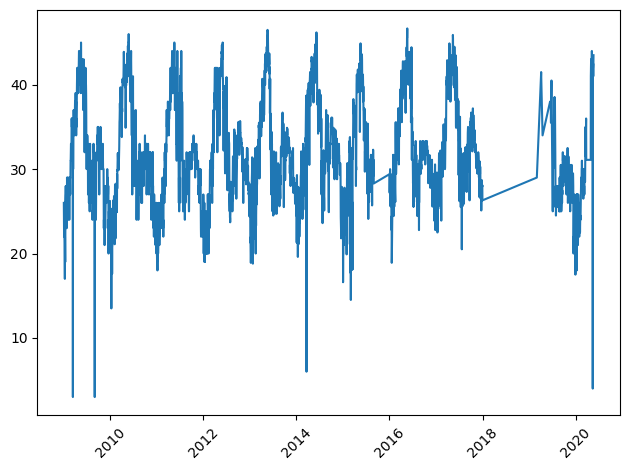

In [17]:
plt.plot(max_temp['Date'],max_temp['Max.'])
plt.xticks(rotation=45)
plt.tight_layout()

In [18]:
ts_data = max_temp[['Date', 'Max.']].copy()
ts_data.set_index('Date', inplace=True)

In [19]:
ts_data.sort_index(inplace=True)
ts_data

,Max.
Date,
2009-01-01,26.0
2009-01-02,24.0
2009-01-03,22.0
2009-01-04,26.0
2009-01-05,26.0
...,...
2020-05-19,41.0
2020-05-20,43.0
2020-05-20,43.0


In [20]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf , plot_acf
from sklearn.metrics import mean_squared_error , mean_absolute_error , root_mean_squared_error

In [21]:
result = adfuller(ts_data['Max.'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

ADF Statistic: -5.196652567904511
p-value: 8.93149351413453e-06


In [22]:
# arima parameters ---> order(p , d , q )
# p : Autoregressive (AR) Component : The number of lagged observations (past values) included in the model to predict the current value.
# d : Differencing (Integration) : The number of times the time series is differenced to make it stationary (i.e., to remove trends and stabilize the mean)
# q : Moving Average (MA) Component : The MA component models the relationship between the current value and past forecast errors.
model = ARIMA(ts_data['Max.'].iloc[ : 3950 ], order=(2, 0, 3))  # d=0 since data is stationary
model_fit = model.fit()
print(model_fit.summary())

C:\Python Installation\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Python Installation\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Python Installation\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   Max.   No. Observations:                 3950
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -8528.777
Date:                Thu, 21 Aug 2025   AIC                          17071.554
Time:                        14:05:14   BIC                          17115.524
Sample:                             0   HQIC                         17087.150
                               - 3950                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.7355      1.313     24.168      0.000      29.162      34.309
ar.L1          1.5623      0.077     20.160      0.000       1.410       1.714
ar.L2         -0.5672      0.076     -7.437      0.0

In [23]:
residuals = model_fit.resid

## PACF plot for p parameter 

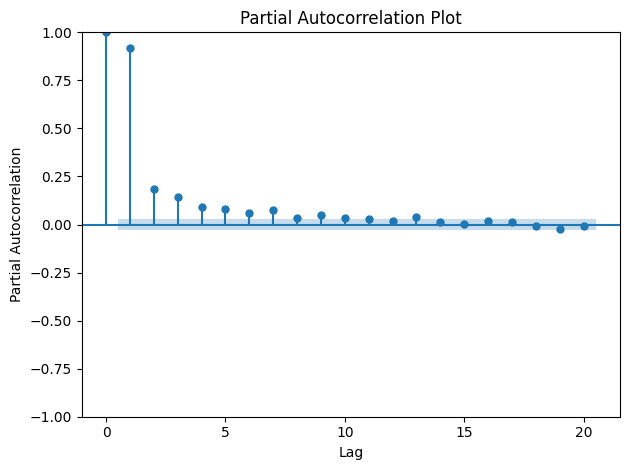

In [24]:
# PACF plot -> PACF plot shows the corelation of a day from its respective lag days , it removes indirect corelation .
# lag dasy means past shift values.

plot_pacf(max_temp['Max.'], lags=20, method='ywm')
# this plot shown that we can set the value of p = 1 , setting the parameters will make the model better 

plt.title('Partial Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.tight_layout()
plt.show()

## ACF Plot for q parameter

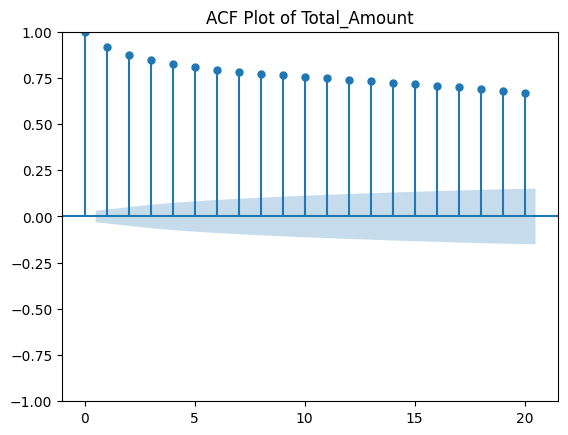

In [25]:
# PACF plot -> PACF plot shows the corelation of a day from its respective lag days weather is direct or indirect.

plot_acf(ts_data['Max.'], lags=20)  # lags=30 means look 30 days back
plt.title('ACF Plot of Total_Amount')
plt.show()

In [26]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   Max.   No. Observations:                 3950
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -8528.777
Date:                Thu, 21 Aug 2025   AIC                          17071.554
Time:                        14:05:14   BIC                          17115.524
Sample:                             0   HQIC                         17087.150
                               - 3950                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.7355      1.313     24.168      0.000      29.162      34.309
ar.L1          1.5623      0.077     20.160      0.000       1.410       1.714
ar.L2         -0.5672      0.076     -7.437      0.0

In [27]:
forecast = model_fit.forecast(steps=10)

mae = mean_absolute_error(ts_data[ 3950 : 3960], forecast)
rmse = np.sqrt(mean_squared_error(ts_data[ 3950 : 3960], forecast))

print(mae,rmse)

0.059298130533731806 0.06354769198880747


C:\Python Installation\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Python Installation\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [47]:
forecast

3950    31.118578
3951    31.130899
3952    31.141304
3953    31.150129
3954    31.158012
3955    31.165323
3956    31.172274
3957    31.178986
3958    31.185530
3959    31.191946
Name: predicted_mean, dtype: float64

# XGBoost Regressor

In [28]:
from xgboost import XGBRegressor
import numpy as np
df = pd.read_csv('combined & cleaned.csv')

In [29]:
df

,Unnamed: 0,Date,Max.,Min.,Morn,Eve,Rain,Rainy Days,PE,Year
0,0,01.01.20,21.0,13.5,78.0,48.0,0.0,0.0,0.43,1996
1,1,2.01.20,22.5,13.5,78.0,48.0,2.0,1.0,0.43,1996
2,2,3.01.20,21.5,15.5,78.0,48.0,0.0,0.0,0.43,1996
3,3,4.01.20,19.0,11.5,78.0,48.0,0.0,0.0,0.87,1996
4,4,5.01.20,23.0,8.0,78.0,48.0,0.0,0.0,1.74,1996
...,...,...,...,...,...,...,...,...,...,...
4003,7804,17.05.20,42.0,24.0,78.0,48.0,0.0,0.0,8.25,2020
4004,7805,18.05.20,42.5,23.5,78.0,48.0,0.0,0.0,7.81,2020
4005,7806,19.05.20,41.0,21.5,78.0,48.0,0.0,0.0,9.55,2020
4006,7807,20.05.20,43.0,21.0,78.0,48.0,0.0,0.0,9.98,2020


In [30]:
# Rename columns for easier handling
df.rename(columns={'Max.': 'Max', 'Min.': 'Min', 'Rainy Days ': 'Rainy_Days'}, inplace=True)

In [31]:
cols_to_drop = ['Unnamed: 0', 'Year', 'Morn', 'Eve', 'PE']
for col in cols_to_drop:
    if col in df.columns:
        df.drop(columns=[col], inplace=True)

In [32]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.groupby('Date').mean().reset_index()
df = df.sort_values('Date')

C:\Users\Nakesh\AppData\Local\Temp\ipykernel_16184\360444335.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


In [33]:
# Drop rows with missing values in essential columns
df = df.dropna(subset=['Max', 'Min', 'Rain', 'Rainy_Days'])

In [34]:
df['Next_Max'] = df['Max'].shift(-1)

In [35]:
df['Next_Month'] = df['Date'].dt.month.shift(-1)
df['Next_DayOfYear'] = df['Date'].dt.dayofyear.shift(-1)

df['Max_lag1'] = df['Max'].shift(1)
df['Min_lag1'] = df['Min'].shift(1)
df['Rain_lag1'] = df['Rain'].shift(1)
df['Rainy_Days_lag1'] = df['Rainy_Days'].shift(1)

In [36]:
df = df.dropna().reset_index(drop=True)

In [37]:
df

,Date,Max,Min,Rain,Rainy_Days,Next_Max,Next_Month,Next_DayOfYear,Max_lag1,Min_lag1,Rain_lag1,Rainy_Days_lag1
0,2009-01-02,26.0,11.0,0.0,0.0,32.0,1.0,3.0,26.0,11.0,0.0,0.0
1,2009-01-03,32.0,14.0,0.0,0.0,37.0,1.0,4.0,26.0,11.0,0.0,0.0
2,2009-01-04,37.0,18.0,0.0,0.0,44.0,1.0,5.0,32.0,14.0,0.0,0.0
3,2009-01-05,44.0,25.0,0.0,0.0,40.0,1.0,6.0,37.0,18.0,0.0,0.0
4,2009-01-06,40.0,27.0,0.0,0.0,34.0,1.0,7.0,44.0,25.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3493,2020-11-05,38.0,22.0,1.5,1.0,25.0,12.0,336.0,31.1,19.0,0.0,0.0
3494,2020-12-01,25.0,4.5,0.0,0.0,27.0,12.0,337.0,38.0,22.0,1.5,1.0
3495,2020-12-02,27.0,9.5,0.0,0.0,29.5,12.0,338.0,25.0,4.5,0.0,0.0
3496,2020-12-03,29.5,13.0,0.0,0.0,31.1,12.0,339.0,27.0,9.5,0.0,0.0


In [38]:
feature_cols = ['Max_lag1', 'Min_lag1', 'Rain_lag1', 'Rainy_Days_lag1', 'Next_Month', 'Next_DayOfYear']
X_train = df[feature_cols].iloc[ :3000 ]
y_train = df['Next_Max'].iloc[ :3000 ]

X_test = df[feature_cols].iloc[3000 : ]
y_test = df['Next_Max'].iloc[3000 :]

In [39]:
model = XGBRegressor(
    max_depth=5,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [40]:
# Prepare data for forecasting
last_row = df.iloc[-1]
last_date = last_row['Date']
last_max = last_row['Max']
last_min = last_row['Min']
last_rain = last_row['Rain']
last_rainy = last_row['Rainy_Days']


In [41]:
# Forecast next 30 days
predictions = []
forecast_dates = []

In [42]:
for i in range(1, 31):
    next_date = last_date + pd.Timedelta(days=i)
    next_month = next_date.month
    next_doy = next_date.dayofyear
    
    input_features = np.array([[last_max, last_min, last_rain, last_rainy, next_month, next_doy]])
    predicted_max = model.predict(input_features)[0]
    
    predictions.append(predicted_max)
    forecast_dates.append(next_date)
    
    # Update for next iteration (only updating max temp; keeping other vars same)
    last_max = predicted_max

In [43]:
forecast_df = pd.DataFrame({
    'Date': forecast_dates,
    'Predicted_Max_Temp': predictions
})

In [44]:
print("\nForecasted Maximum Temperatures for Next 30 Days:")
print(forecast_df)


Forecasted Maximum Temperatures for Next 30 Days:
         Date  Predicted_Max_Temp
0  2020-12-05           37.066151
1  2020-12-06           41.625523
2  2020-12-07           37.409615
3  2020-12-08           38.054310
4  2020-12-09           38.657623
5  2020-12-10           37.218700
6  2020-12-11           37.367004
7  2020-12-12           36.604118
8  2020-12-13           35.324905
9  2020-12-14           33.784107
10 2020-12-15           29.406887
11 2020-12-16           28.297438
12 2020-12-17           26.373188
13 2020-12-18           27.186073
14 2020-12-19           26.119761
15 2020-12-20           26.523596
16 2020-12-21           27.186073
17 2020-12-22           26.119761
18 2020-12-23           26.523596
19 2020-12-24           27.026417
20 2020-12-25           25.960104
21 2020-12-26           26.907452
22 2020-12-27           26.439701
23 2020-12-28           27.026417
24 2020-12-29           25.383247
25 2020-12-30           25.607864
26 2020-12-31           26.6573

In [45]:
y_predicted = model.predict(X_test)

In [46]:
mae = mean_absolute_error(y_test, y_predicted)
rmse = np.sqrt(mean_squared_error(y_test, y_predicted))
print("MAE:", mae)
print("RMSE:", rmse)

MAE: 3.036485812941708
RMSE: 4.292000908535504
